### Preprocessing
---
#### [Method]
#### 1. histogram

In [125]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

In [126]:
# Set Config
CONFIG = {
    "data_dir": "./data_1.csv"
    , "max_threshold": -0.4519155544559894
    , "mean_threshold": -1.5539381264460053
}

In [127]:
# Load Data
rawdata = pd.read_csv(CONFIG['data_dir'], index_col=0).T

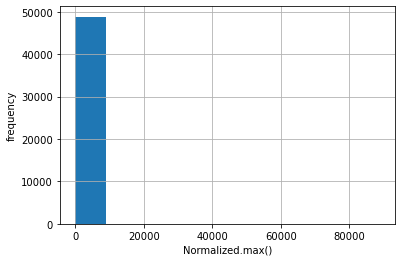

In [128]:
plt.hist(rawdata.max(axis=0), bins=10)
plt.grid()
plt.xlabel("Normalized.max()")
plt.ylabel("frequency")
plt.savefig("./normalized_max.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)

-0.4519155544559894


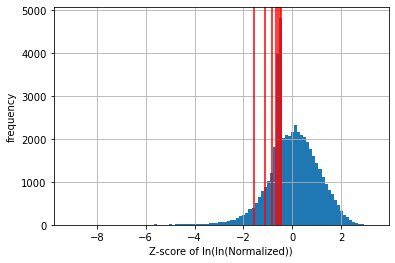

In [129]:
zmax = stats.zscore(np.log(np.log(rawdata.max())))
plt.grid()
plt.xlabel("Z-score of ln(ln(Normalized))")
plt.ylabel("frequency")
plt.hist(zmax, bins=100)
plt.savefig("./Zscore_ln(ln(normalized_max)).png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)
for i in range(1, 8):
    v = np.percentile(zmax, 5*i)
    plt.axvline(x=v, c="r")
    
print(np.percentile(zmax, 35))

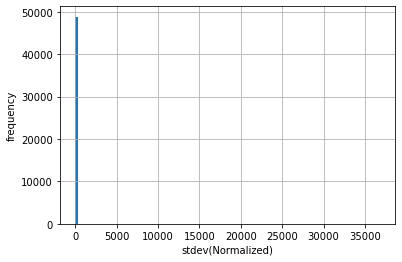

In [130]:
# stdev_thresholdを考えような感じ-log ver.
std = rawdata.std()
plt.xlabel("stdev(Normalized)")
plt.ylabel("frequency")
std.hist(bins=100)
plt.savefig("./stdev(normalized).png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)

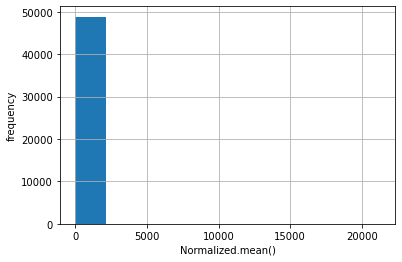

In [131]:
plt.hist(rawdata.mean(axis=0), bins=10)
plt.grid()
plt.xlabel("Normalized.mean()")
plt.ylabel("frequency")
plt.savefig("./normalized_mean.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)

-1.5539381264460053


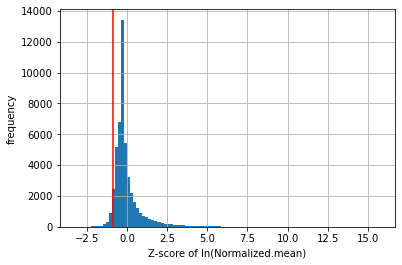

In [132]:
zmean = stats.zscore(np.log(rawdata.mean()))
plt.grid()
plt.xlabel("Z-score of ln(Normalized.mean)")
plt.ylabel("frequency")
plt.hist(zmean, bins=100)
plt.savefig("./Zscore_ln(normalized_mean).png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)
for i in range(1, 2):
    v = np.percentile(zmean, 5*i)
    plt.axvline(x=v, c="r")

print(np.percentile(zmax, 5))

In [133]:
df = rawdata.loc[:, stats.zscore(np.log(np.log(rawdata.max())))>CONFIG["max_threshold"]]
df.to_csv(f"data_Zscore(ln(ln(max)))>{CONFIG['max_threshold']}.csv", index=True)
df

GeneSymbol,A1BG-AS1,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,AA06,AACSP1,AADAC,AADAC,...,ZSWIM6,ZSWIM8-AS1,ZWINT,ZWINT,ZXDA,ZXDC,ZXDC,ZYG11A,ZYX,ZZEF1
HCE-group1,0.966142,1.334170,1.701727,1.143557,1.419755,2.101355,1.382521,1.222376,1.536244,1.154999,...,1.058791,0.886258,0.012639,0.011378,1.326753,1.487131,0.768129,0.685911,0.723078,1.385136
HCE-group2,0.895675,0.435899,1.101959,1.240063,1.288893,0.906807,1.241442,0.607031,1.373055,1.045787,...,1.259343,2.935013,0.011165,0.009455,2.075996,1.160760,0.673543,0.615149,0.854355,1.644356
HCE-group3,0.835578,0.950616,1.526894,2.893388,1.514479,0.822678,1.457003,1.176685,1.614785,1.913634,...,1.749863,3.198322,0.014984,0.005773,2.166143,1.053459,0.520007,0.721815,0.931984,1.769639
iPS-1,0.616244,0.045829,0.710960,3.718910,1.001391,3.041766,1.021474,1.297939,1.005778,0.769199,...,0.588669,0.996625,0.906970,0.890340,1.343377,0.627733,1.597505,3.273970,1.244075,0.474302
iPS-2,0.612935,0.007708,0.819134,4.901699,0.998611,2.704741,1.672161,0.764695,1.015631,1.270889,...,0.656977,1.317069,0.984431,0.966673,1.127431,0.781935,1.876895,3.427181,1.063850,0.484983
iPS-3,0.498943,0.032557,1.038899,4.747103,0.867807,2.519607,0.874932,1.712152,0.875503,0.706077,...,0.503313,1.232360,0.896760,0.892327,0.463025,0.844544,2.180764,2.984722,1.021302,0.525226
CECSi -1,1.667225,8.366821,1.303082,0.627889,1.786787,0.552605,0.844468,0.703901,0.834011,1.359532,...,0.422956,0.426714,1.049316,1.091028,1.268874,1.686629,1.014412,2.146822,2.379174,1.054211
CECSi -2,1.619578,4.579539,1.564560,0.728686,0.955365,0.773664,0.954699,0.925682,0.981762,2.843432,...,0.384238,0.362890,1.306203,1.175367,1.378862,2.016147,0.853374,1.213499,2.421958,1.163564
CECSi -3,1.611442,3.763584,1.710465,1.173966,0.906775,0.824606,0.909324,0.902398,0.943862,1.071924,...,0.471079,0.413762,1.095128,1.124049,1.328803,2.247507,0.922812,1.176043,2.543450,1.145989
NCC-1,0.676305,1.015680,1.098091,0.943288,0.967922,0.442211,0.978977,0.799652,2.086308,1.658386,...,1.032733,1.143160,1.695820,1.874190,2.818332,1.026403,1.641077,0.624319,0.827935,1.202614


In [134]:
df2 = rawdata.loc[:, stats.zscore(np.log(rawdata.mean()))>CONFIG["mean_threshold"]]
df2

GeneSymbol,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2M-AS1,A2ML1,A2MP1,A2MP1,A2MP1,...,ZXDC,ZXDC,ZYG11A,ZYG11A,ZYG11B,ZYG11B,ZYX,ZZEF1,ZZZ3,ZZZ3
HCE-group1,1.000056,0.966142,1.394532,1.334170,1.701727,1.500746,1.143557,1.444779,1.419755,1.398625,...,1.487131,0.768129,1.458012,0.685911,0.792662,0.652980,0.723078,1.385136,0.555009,0.546110
HCE-group2,0.715089,0.895675,1.246813,0.435899,1.101959,1.001142,1.240063,1.275872,1.288893,1.280267,...,1.160760,0.673543,1.286080,0.615149,0.575327,0.476398,0.854355,1.644356,0.510352,0.497099
HCE-group3,0.709303,0.835578,1.467092,0.950616,1.526894,1.223778,2.893388,1.510075,1.514479,1.495705,...,1.053459,0.520007,1.531384,0.721815,0.542760,0.439559,0.931984,1.769639,0.421634,0.420685
iPS-1,0.546546,0.616244,1.011377,0.045829,0.710960,0.788456,3.718910,1.036273,1.001391,1.008209,...,0.627733,1.597505,1.260853,3.273970,0.535806,0.590059,1.244075,0.474302,0.754256,0.860746
iPS-2,0.562911,0.612935,1.016362,0.007708,0.819134,0.819207,4.901699,1.035828,0.998611,1.010619,...,0.781935,1.876895,1.030249,3.427181,0.634544,0.591912,1.063850,0.484983,0.816546,0.896298
iPS-3,0.493949,0.498943,0.885942,0.032557,1.038899,0.885125,4.747103,0.900792,0.867807,0.885751,...,0.844544,2.180764,0.896262,2.984722,0.629322,0.557453,1.021302,0.525226,0.785896,0.923506
CECSi -1,1.369291,1.667225,0.850677,8.366821,1.303082,1.234487,0.627889,0.863105,1.786787,0.852930,...,1.686629,1.014412,1.201525,2.146822,1.105855,1.030322,2.379174,1.054211,1.104199,1.158465
CECSi -2,1.261285,1.619578,0.965701,4.579539,1.564560,1.549900,0.728686,0.988962,0.955365,0.963077,...,2.016147,0.853374,0.984058,1.213499,1.377021,1.165150,2.421958,1.163564,1.056352,1.152784
CECSi -3,1.344405,1.611442,0.920133,3.763584,1.710465,1.372459,1.173966,0.944627,0.906775,0.915194,...,2.247507,0.922812,0.944774,1.176043,1.371966,1.190965,2.543450,1.145989,1.031135,1.114911
NCC-1,0.457455,0.676305,0.988751,1.015680,1.098091,1.031787,0.943288,1.006851,0.967922,0.984071,...,1.026403,1.641077,1.001076,0.624319,1.142570,0.919100,0.827935,1.202614,1.353117,1.620690
